# 가우시안 혼합모형과 EM 방법

## 가우시안 혼합모형

$K$-클래스 카테고리 확률변수 $Z$가 있다고 하자. 확률분포함수는 다음과 같다(카테고리 분포의 각 클래스 나올 확률이 $\pi$로 표현되어 있음. 기존에는 $\mu$로 자주 썼었음).

$$ p(z=k) = \pi_k $$

실수값을 출력하는 확률변수 $X$는 확률변수 $Z$의 표본값 $k$에 따라 기댓값 $\mu_k$, 분산 $\Sigma_k$이 달라진다. 즉, 하단의 표현을 보면 x는 정규분포인데 $k$에 따라 기댓값과 표준편차가 달라진다.

$$ p(x \mid z) = \mathcal{N}(x\mid \mu_k, \Sigma_k) $$

이를 결합하면(joint분포를 Z싹다 더한거니깐, marginal이 되는 식)

$$ p(x) = \sum_Z p(z)p(x\mid z) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x \mid \mu_k, \Sigma_k) $$

이 된다.

실수값을 출력하는 확률변수 $X$가 $K$-클래스 카테고리 확률변수 $Z$의 값에 따라 다른 기댓값과 분산을 가지는 복수의 가우시안 정규분포들로 이루어진 모형을 가우시안 혼합(Gaussian Mixture) 모형이라고 한다.

단 가우시안 혼합모형에서 카테고리 확률변수 $Z$의 값을 알 수가 없다. 즉 관측되지 않는다고 가정한다. 이렇게 관측 데이터가 보이지 않는, 즉 내부에 숨겨진(latent) 확률 변수를 포함하는 모형을 잠재변수모형(latent variable model)이라고 한다. 잠재변수는 혼합모형처럼 카테고리값이 될 수도 있고 다른 모형에서는 실수값도 될 수 있다.

![1_230.png](./materials/1_230.png)

### 베르누이-가우시안 혼합모형

카테고리가 두 개인 가우시안 혼합모형은 베르누이-가우시안 혼합모형(Bernouilli Gaussian-Mixuture Model)이라고 한다.

![1_186.jpeg](./materials/1_186.jpeg)

그림 52.1 : 베르누이-가우시안 혼합모형의 예

다음은 2개의 카테고리와 2차원 가우시안 정규분포를 가지는 가우시안 혼합모형 데이터의 예이다.

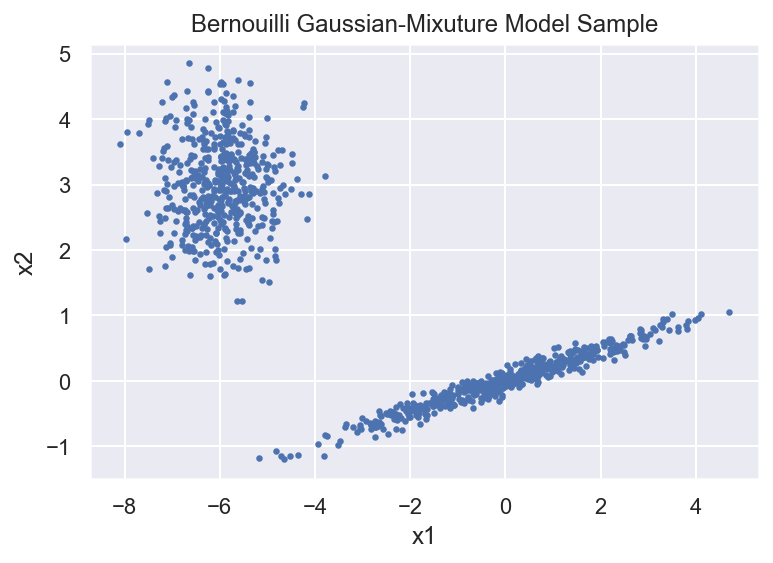

In [2]:
from numpy.random import randn

n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Bernouilli Gaussian-Mixuture Model Sample")
plt.show()

![1_231.jpeg](./materials/1_231.jpeg)
![1_231.jpeg](./materials/1_232.jpeg)

생각해보면, 지금 구하고 추정하는게 Hidden Markov Model과 비슷함. <br>
다만, 차이점은 HMM에서는 hidden과 observations가 둘다 discrete이였음. 

## 가우시안 혼합모형의 모수 추정

**구해야 하는 모수.** 
- 던지는 동전 자체의 모수 $\pi_1$, $\pi_2$
- 각각의 카테고리일때 분포의 모수들 $\theta$ (평균과 표준편차)

데이터로부터 가우시안 혼합모형의 모수를 추정한다는 것은 관측되지 않는 카테고리 분포의 확률분포와 각각의 카테고리에서의 가우시안 정규분포 모수를 모두 추정하는 것을 말한다. 이 때 어려운 점은 확률분포함수가 선형대수 방법으로 쉽게 구할 수 없는 복잡한 형태를 가진다는 점이다. 

$N$개의 데이터에 대한 $X$의 확률분포는 

$$ p(x) = \prod_{i=1}^N p(x_i) = \prod_{i=1}^N \sum_{z_i} p(x_i,z_i) = \prod_{i=1}^N \sum_{z_i} p(z_i)p(x_i\mid z_i)  = \prod_{i=1}^N \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k) $$

이고 로그를 취하면

$$  \log p(x) = \sum_{i=1}^N \log \left( \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k) \right) $$

이다. 두 식 모두 미분값이 0이 되는 모수값을 쉽게 구할 수 없다.

만약 데이터 $x_i$가 어떤 카테고리 $z_i$에 속하는지를 안다면 같은 카테고리에 속하는 데이터만 모아서 카테고리 확률분포 $\pi_k$도 알 수 있고 가우시안 정규분포의 모수 $\mu_k, \Sigma_k$도 쉽게 구할 수 있을 것이다. 하지만 실제로는 데이터 $x_i$가 가지고 있는 카테고리 값 $z_i$를 알 수가 없기 때문에 위  확률분포함수 $p(x)$를 최대화하는 $\pi_k$와 $\mu_k, \Sigma_k$를 비선형 최적화를 통해 구해야 한다.

네트워크 확률모형 관점에서는 확률변수 $Z_i$가 확률변수 $X_i$에 영향을 미치는 단순한 모형이다. 다만 $i=1,\dots,N$인 모든 경우에 대해 반복적으로 영행을 미치므로 이를 다음과 같은 판넬 모형으로 표현한다.

그림 52.2 : 판넬 모형

## EM(Expectation-Maximization)

![2_233.jpeg](./materials/2_233.jpeg)
![2_233.jpeg](./materials/2_234.jpeg)

지금 z는 카테고리(베르누이) 분포 였음. <br>
$p(z=k|x_i)$의 의미는? i번째 데이터가 있을 때 $z=k$일 확률? <br>

$\pi_{ik}$는 곧, i번째 데이터가 k번째 카테고리(클러스터)에 속할 확률. 


혼합모형의 모수추정에서 중요한 역할을 하는 것 중의 하나가 바로 각 데이터가 어떤 카테고리에 속하는가를 알려주는 조건부 확률 $p(z\mid x)$ 값이다. 이 값을 responsibility라고 한다.

$$ 
\begin{eqnarray}
\pi_{ik} 
&=& p(z_i=k\mid x_i) \\
&=& \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{p(x_i)} \\
&=& \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{\sum_{k=1}^K p(x_i,z_i=k)} \\
&=& \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{\sum_{k=1}^K p(z_i=k)p(x_i\mid z_i=k)} 
\end{eqnarray}
$$

가우시안 혼합모형의 경우 다음과 같이 정리할 수 있다. 

$$ 
\pi_{ik} = \dfrac{\pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k)}{\sum_{k=1}^K \pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k)} 
$$


이 식은 모수로부터 responsibility를 추정한다.

$$ (\pi_k, \mu_k, \Sigma_k) \;\; \implies \;\; \pi_{ik} $$


$\pi_{ik}$는 $i$번째 데이터 $x_i$가 카테고리 $k$에서 만들어졌을 확률을 나타낸다.

이제 로그-결합확률분포함수를 최대화한다.

우선 $\mu_k$로 미분하여 0이 되도록 하는 방정식을 만들면 다음과 같다.

$$ 0 = - \sum_{i=1}^N \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{\sum_{k=1}^K p(z_i=k)p(x_i\mid z_i=k)} \Sigma_k (x_i - \mu_k ) $$

이를 정리하면,

$$ \sum_{i=1}^N \pi_{ik} (x_i - \mu_k ) = 0$$

$$ \mu_k = \dfrac{1}{N_k} \sum_{i=1}^N \pi_{ik} x_i $$

위 식에서 
$$ N_k = \sum_{i=1}^N \pi_{ik} $$

이고 $k$ 카테고리에 속하는 데이터의 수와 비슷한 의미를 가진다. 즉 $\mu_k$는 $k$카테고리에 속하는 데이터의 샘플 평균과 같의 의미이다.

마찬가지로 로그-결합확률분포함수를 $\Sigma_k$로 미분하여 최대화하는 모수값을 구하면 다음과 같다.

$$ \Sigma_k = \dfrac{1}{N_k} \sum_{i=1}^N \pi_{ik} (x_i-\mu_k)(x_i-\mu_k)^T $$


마지막으로 로그-결합확률분포함수를 $\pi_k$로 미분하여 최대화하는 모수값을 구해야 하는데 이 때 카테고리값의 모수가 가지는 제한 조건으로 인해 Lagrange multiplier 를 추가해야 한다.

$$ \log p(x) + \lambda \left(\sum_{k=1}^K \pi_k - 1 \right) $$


이를 $\pi_k$로 미분하여 0이 되는 값을 찾으면 다음과 같다.

$$ \pi_k = \dfrac{N_k}{N} $$


이 세가지 식은 모두 responsibility로부터 모수를 구하고 있다.

$$ \pi_{ik} \;\; \implies \;\; (\pi_k, \mu_k, \Sigma_k ) $$


원래는 연립방정식의 해를 구하는 방법으로 responsibility를 포함한 모수값을 추정해야 한다. 그러나 만약 식의 형태가 responsibility를 알고 있다면 모수를 추정하는 것이 간단하도록 만들어져 있기 때문에 EM(Expectation-Maximization)이라고 하는 iterative 방법을 사용하면 연립방정식의 해를 구하는 것보다 더 쉽게 모수를 추정할 수 있다.

EM 방법은 모수와 responsiblity를 번갈아 추정하며 정확도를 높여가는 방법이다.

* E step 에서는 우리가 현재까지 알고 있는 모수가 정확하다고 가정하고 이를 사용하여 각 데이터가 어느 카테고리에 속하는지 즉, responsiblity를 추정한다.

$$ (\pi_k, \mu_k, \Sigma_k) \;\; \implies \;\; \pi_{ik} $$

* M step 에서는 우리가 현재까지 알고 있는 responsibility가 정확하다고 가정하고 이를 사용하여 모수값을 추정한다.

$$ \pi_{ik} \;\; \implies \;\; (\pi_k, \mu_k, \Sigma_k)  $$

이를 반복하면 모수와 responsibility를 동시에 점진적으로 개선할 수 있다.

## 클러스터링


각각의 데이터에 대해 responsibility을 알게되면 responsibility가 가장 큰 카테고리를 찾아내어 그 데이터가 어떤 카테고리에 속하는지를 알 수 있다. 즉 클러스터링을 할 수 있다.

$$ k_i = \arg\max_{k} \pi_{ik} $$

사실 K-means clustering은 EM 방법의 특수한 경우라고 볼 수 있다.

## Scikit-Learn의 GaussianMixture 클래스

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

def plot_gaussianmixture(n):
    model = GaussianMixture(n_components=2, init_params='random', random_state=0, tol=1e-9, max_iter=n)
    with ignore_warnings(category=ConvergenceWarning):
        model.fit(X)
    pi = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=pi[:, 0])
    plt.title("iteration: {}".format(n))

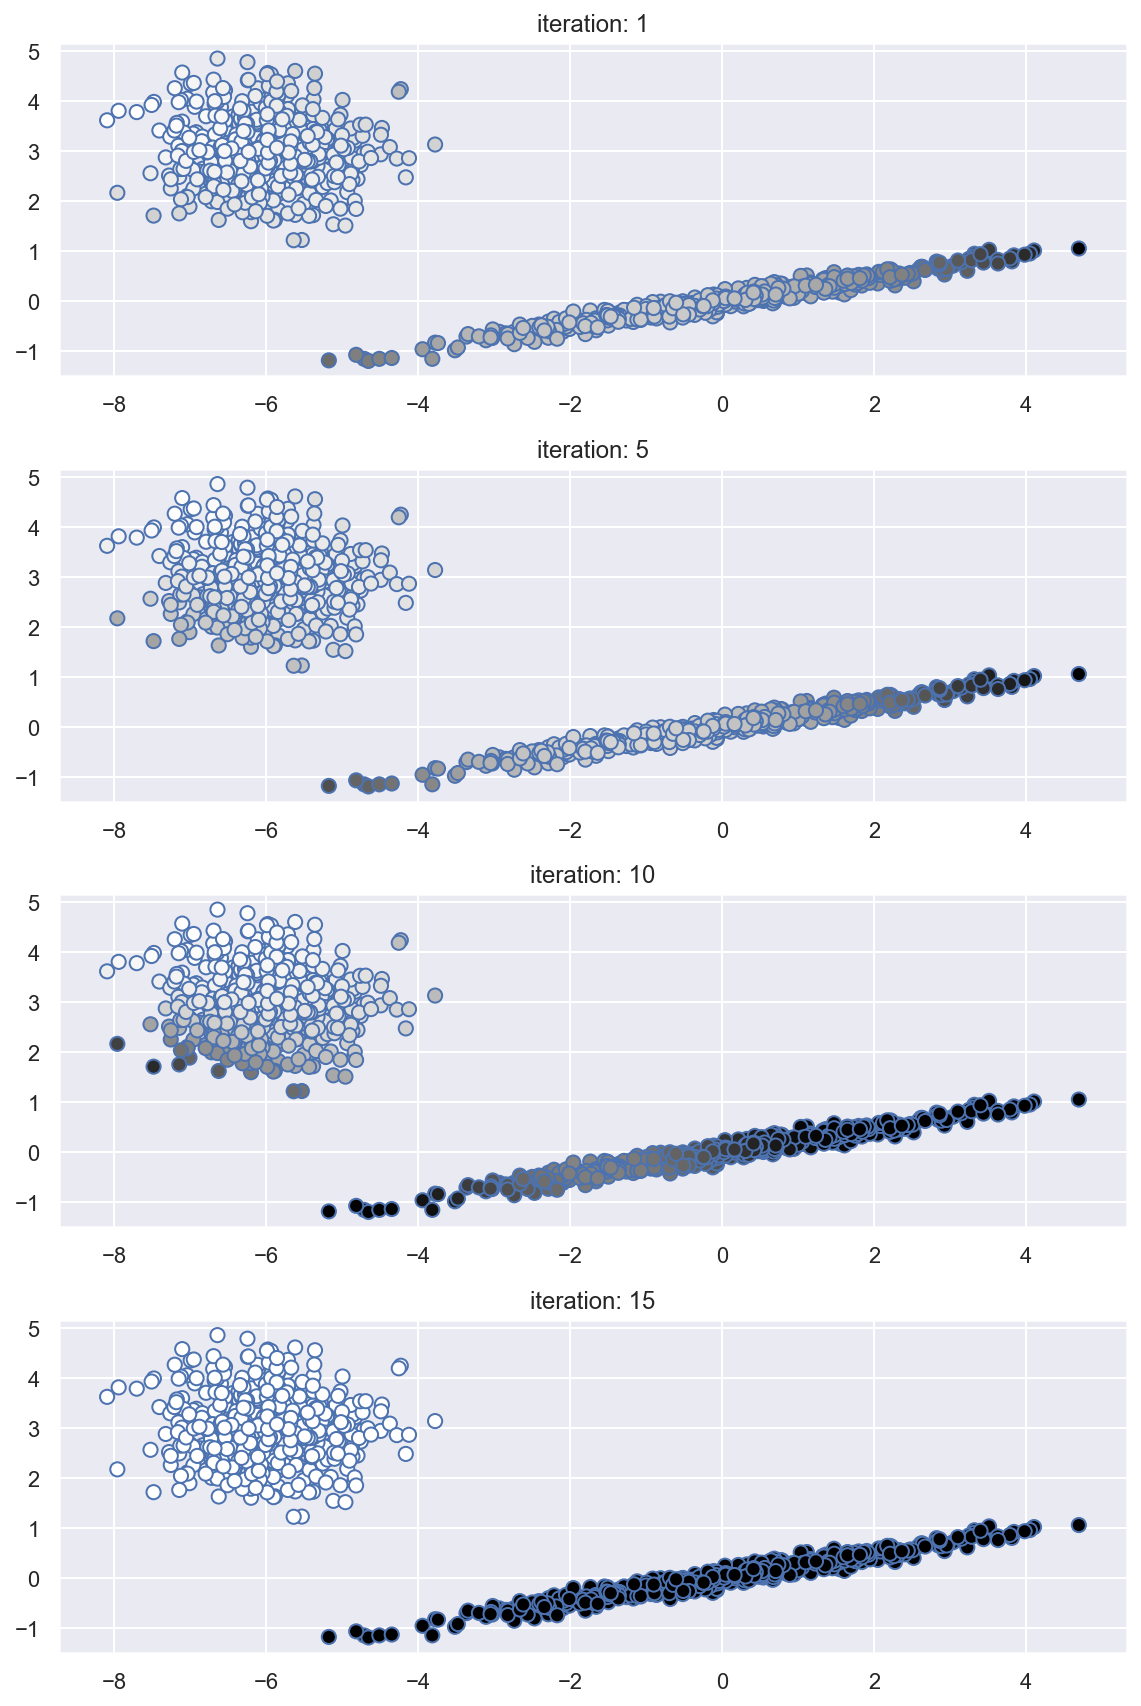

In [8]:
plt.figure(figsize=(8, 12))
plt.subplot(411)
plot_gaussianmixture(1)
plt.subplot(412)
plot_gaussianmixture(5)
plt.subplot(413)
plot_gaussianmixture(10)
plt.subplot(414)
plot_gaussianmixture(15)
plt.tight_layout()
plt.show()

iter1을 보면, 처음에 $\pi_1=0.5$, $\pi_2=0.5$로 시작 <br>
그 다음에, 점점 Iter돌면서 분리 되기 시작함. 

## 일반적 EM 알고리즘

![2_235.jpeg](./materials/2_235.jpeg)

EM 알고리즘은 잠재변수 $z$에 의존하는 확률변수 $x$가 있고 $z$는 관측 불가능하며 $x$만 관측할 수 있는 경우 확률분포 $p(x)$를 추정하는 방법이다. 
다만 네트워크 모형에 의해 조건부확률분포 $p(x\mid z, \theta)$는 모수 $\theta$에 의해 결정되며 그 수식은 알고 있다고 가정한다.

혼합모형의 경우에는 $z$가 이산확률변수이므로 

$$ p(x \mid  \theta) = \sum_z p(x, z \mid  \theta) = \sum_z q(z) p(x\mid z, \theta) $$

가 성립한다.

주어진 데이터 $x$에 대해  가능도 $p(x \mid  \theta)$를 가장 크게 하는 잠재변수에 대한 확률분포 $q(z)$와 $\theta$를 구하는 것이 EM 알고리즘의 목표이다.

우선 다음 수식을 증명하자.

$$
\log p(x) = 
\sum_z q(z) \log \left(\dfrac{p(x, z \mid  \theta)}{q(z)}\right) -
\sum_z q(z) \log \left(\dfrac{p(z\mid x,  \theta)}{q(z)}\right)
$$

(증명)

$$
\begin{eqnarray}
\sum_z q(z) \log \left(\dfrac{p(x, z \mid  \theta)}{q(z)}\right)
&=& \sum_z q(z) \log \left(\dfrac{p(z \mid  x, \theta)p(x \mid  \theta)}{q(z)}\right) \\
&=& \sum_z \left( q(z) \log \left(\dfrac{p(z \mid  x, \theta)}{q(z)}\right) + q(z) \log p(x \mid  \theta) \right) \\
&=& \sum_z  q(z) \log \left(\dfrac{p(z \mid  x, \theta)}{q(z)}\right) + \sum_z q(z) \log p(x \mid  \theta)  \\
&=& \sum_z  q(z) \log \left(\dfrac{p(z \mid  x, \theta)}{q(z)}\right) + \log p(x \mid  \theta)  \\
\end{eqnarray}
$$

이제부터 이 식의 첫 항은 $L(q, \theta)$, 두번째 항은 $KL(q \mid  p)$라고 쓰도록 한다.

$$
L(q, \theta) = 
\sum_z q(z) \log \left(\dfrac{P(x, z \mid  \theta)}{q(z)}\right)
$$

$$
KL(q \mid  p) = 
-\sum_z q(z) \log \left(\dfrac{p(z\mid x,  \theta)}{q(z)}\right)
$$

$$
\log p(x) = L(q, \theta) + KL(q \mid  p)
$$

$L(q, \theta)$는 분포함수 $q(z)$를 입력하면 수치가 출력되는 범함수(functional)이다. $KL(q \mid  p)$은 분포함수 $q(z)$와 $p(z\mid x, \theta)$의 차이를 나타내는 쿨백-라이블러 발산이다. 쿨백-라이블러 발산은 항상 0과 같거나 크기 때문에 $L(q, \theta)$는 $\log p(x)$의 하한(lower bound)가 된다. 그래서 $L$을 ELBO(evidence lower bound)라고도 한다.

$$ \log p(x) \geq L(q, \theta) $$

반대로 이야기하면 $\log p(x)$가 $L(q, \theta)$의 상한이라고 할 수도 있다.

$L(q, \theta)$를 최대화하면 $\log p(x)$도 최대화된다. EM 알고리즘은 $L(q, \theta)$를 최대화하기위해 $q$와 $\theta$의 최적값을 교대로 찾아낸다. 


(1) E 단계에서는 $\theta$를 현재의 값 $\theta_{\text{old}}$으로 고정시키고 $L(q_\text{old}, \theta_\text{old})$를 최대화하는 $q_{\text{new}}$를 찾는다.
  
맞게 찾았다면 $L(q_{\text{new}}, \theta_\text{old})$는 상한인 $\log p(x)$와 같아진다. 즉 쿨백-라이블러 발산은 0이된다.
   
$$  L(q_{\text{new}}, \theta_\text{old}) = \log p(x) $$

$$ KL(q_{\text{new}} \mid  p) = 0 $$

$$ q_{\text{new}} = p(z\mid x, \theta_{\text{old}}) $$


(2) M 단계에서는 $q$를(현재 q는 각 데이터 별로 어디에 속하는지를 의미 p(Z|x, theta)) 현재의 함수 $q_{\text{new}}$로 고정시키고 $L(q_{\text{new}}, \theta)$를 최대화하는 $\theta_{\text{new}}$값을 찾는다.

최대화를 하였으므로 당연히 $L(q_{\text{new}}, \theta_{\text{new}})$는 옛날 값보다 커진다. 

$$ L(q_{\text{new}}, \theta_{\text{new}}) > L(q_{\text{new}}, \theta_{\text{old}}) $$

그리고 동시에 $p(Z\mid X, \theta_{\text{new}})$이 과거의 값 $p(Z\mid X, \theta_{\text{old}})$과 달라졌으므로 $q_{\text{new}}$는 $p(Z\mid X, \theta_{\text{new}})$와 달라진다.
그러면 쿨백 라이블러 발산의 값도 0보다 커지게 된다.

$$ q_{\text{new}} \neq p(Z\mid X, \theta_{\text{new}}) $$

$$ KL(q_{\text{new}} \mid  p) > 0 $$

# 몬테카를로 베이지안 분석

최종 목표는, **Bayes Estimation**<br>
![2_236.jpeg](./materials/2_236.jpeg)
![2_236.jpeg](./materials/2_237.jpeg)

### 즉, 몬테카를로의 목표 
내가 PDF모양을 주면, 그 PDF랑 똑같은 모양 가지는 랜덤 샘플을 만들고 싶은 것. <br>
그것을 베이지안 추청을 하는데 쓰게 되면, <br>
몬테카를로 베이지안 분석이 되는 것. 

참고
<pre>

근데 이게 무슨소리야. posterior 수식은 정확히 몰라도 그림을 그릴 수 있다? 
근데 그걸 왜 다시 샘플을 뽑아서 그림을 다시 그려? 
맷플롯립 같은 애들은 그리드를 촘촘하게 나눠서 그림을 그리는 방식이야. 
10차원이면? 한 차원을 100개 그리드로만 나눠도 100의 10승개의 그리드로 나눠야함. 
차원이 높으면, 이렇게 그림을 그릴 수가 없음. <br>

샘플을 랜덤하게 뽑아서 그리면, 더 적은 수의 계산을 해도 모양을 비교적 정확하게 알 수 있다. 
<pre>

## 표본 생성

확률변수의 분포함수 $p(X)$를 알고 있다고 하자. 이 분포함수를 따르는 표본을 생성하는 방법들에 대해 공부한다.<br>
근데 이게 어려운 문제였어? scipy의 rvs는 대체 어떻게 했던거야? <br>
그 rvs가 이렇게 하고 있었던 거야. 

* 균일분포
* 역변환
* rejection sampling
* importance sampling

## 균일분포

파이썬의 난수 생성기(Radom Number Generator)는 마츠모토 마코토(松本 眞)와 니시무라 타쿠지(西村 拓士)가 고안한 메르센 트위스터(Mersenne Twister) 알고리즘 중에서 주기가 $2^{19937}-1$인 MT19937 알고리즘을 사용한다. 이 알고리즘에서 생성되는 값은 사실 정확한 난수가 아니라 $2^{19937}-1$ 주기로 반복되는 결정론적 수열이므로 유사 난수 생성기(Pseudo Radom Number Generator)이다. 이 값을 주기로 나누어 0부터 1사이의 부동소수점을 출력하는 균일분포(uniform distribution) 표본 생성에 사용한다.

어쨋든 균일분포에서 하나는 뽑아야돼. 그거는 얘네가 만들어 놓은 것. 


## 역변환

확률분포함수가 수식으로 주어지는 기본적인 확률분포들의 경우에는 역변환(inverse transform) 방법을 사용하여 표본을 생성할 수 있다.

앞서 균일분포함수는 컴퓨터로 생성할 수 있다고 했다. 이 균일분포에서 생성된 $x$값을 임의의 실수로 변환하는 단조증가함수 $f(x)$를 생각해보자.
이 함수를 적용한 값을 $y$라고 하고 $y$를 표본으로 가지는 확률변수를 $Y$라고 하면 $Y$의 누적분포함수는 $f$의 역함수인 $f^{-1}$이 된다.

$$ F_Y(y) = f^{-1}(x) $$

![2_238.jpeg](./materials/2_238.jpeg)

uniform은 동일하게 뽑히는데, 기울기가 크면 그 쪽에 많이 모이겠지. <br>
**CDF의 미분한 값에 따라 확률이 재 배포가(Reallocation) 되는 형태.**<br>
이게 지금까지 사용하던 RVS

그림 51.1 : 역변환

반대로 생각하면 우리가 원하는 확률분포함수 $p(Y)$가 있다면 이 함수를 적분한 함수의 역함수를 균일분포 표본에 적용하면 우리가 원하는 확률분포를 가지게 된다.


$$ x = h(y) = \int_{-\infty}^{y} p(u)du $$

$$ y = h^{-1}(x) $$

근데 문제는, 역함수가 나와야 된다는 것. <br>
우리가 scipy.rvs에서 쓰던 기본적인 분포들은 역함수를 구하는게 어느정도 가능했음. <br>
그런데, 그것도 복잡해지면 불가능 하겠지. <br>
역함수 계산하기 어려우면 **Rejection Sampling**으로 간다.

## Rejection Sampling

우리가 원하는 분포함수가 수식으로 주어지고 적분 및 역함수를 구하기 쉽다면 역변환 방법을 쓸 수 있지만 그렇지 않은 경우에는 rejection sampling이라는  방법을 사용할 수 있다.

rejection sampling 방법에서는 목표 확률분포 $p(x)$와 유사하지만 표본 생성이 쉬운 유사 확률분포 $q(x)$를 사용한다.

* $p(x)$: 샘플링하고자 하는 목표 확률분포
* $q(x)$: 샘플링 가능한 유사 확률분포(덮을 수만 있으면 된다)

방법은 간단하다. 일단 유사 확률분포 $q(x)$의 표본을 생성한 다음에 $p(z)/kq(z)$의 확률로 이 표본을 채택할지 아니면 버릴지를 결정한다. 
이 때 $k$는 $kq(x) \geq p(x)$가 되도록 하는 스케일링 상수이다. 


![2_239.png](./materials/2_239.png)

그림 51.2 : Rejection sampling

![2_240.jpeg](./materials/2_240.jpeg)
![2_240.jpeg](./materials/2_241.jpeg)

실제로 비율이 0에 가까운 애들은 거의 다 버린다는 소리고, 비율이 1에 가까운 애들은 거의 다 acceptance. 

예를 들어 $a=2, b=6$인 베타 분포의 표본을 만들고 싶은데 지금 생성할 수 있는 확률분포는 정규분포밖에 없다고 하자. 그러면 일단 정규분포의 표본을 생성한다. 그리고 모수가 $p(z)/kq(z)$인 베르누이 확률분포의 표본값을 사용하여 표본을 버릴지 채택할 지 결정한다. 

다음 그림에서 왼쪽은 처음에 유사분포로 생성한 표본이고 오른쪽은 채택된 표본을 보이고 있다.

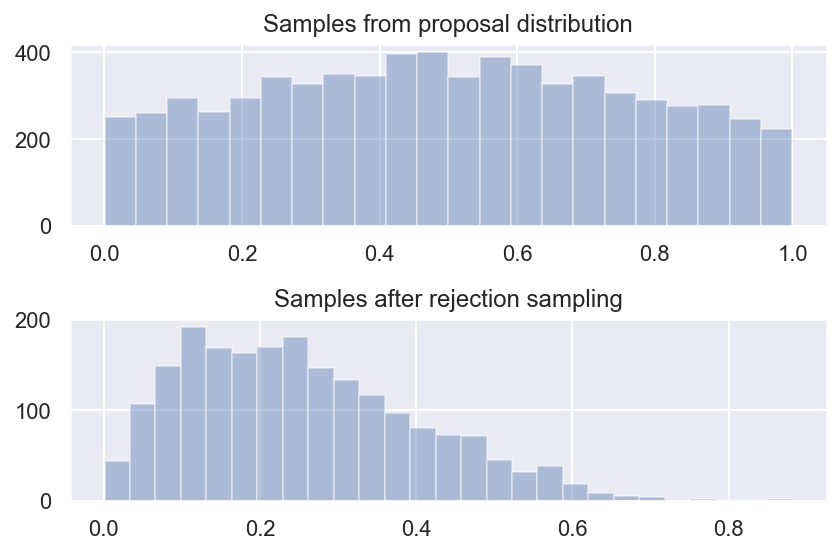

In [9]:
a = 2
b = 6
rv_p = sp.stats.beta(a, b)
rv_q = sp.stats.norm(loc=0.5, scale=0.5)
k = 5

np.random.seed(0)
x_q0 = rv_q.rvs(int(1e4))
x_q = x_q0[(x_q0 >= 0) & (x_q0 <= 1)]
crits = rv_p.pdf(x_q) / (rv_q.pdf(x_q) * k)
coins = np.random.rand(len(x_q))
x_p = x_q[coins < crits]

plt.subplot(211)
sns.distplot(x_q, kde=False)
plt.title("Samples from proposal distribution")
plt.subplot(212)
sns.distplot(x_p, kde=False)
plt.title("Samples after rejection sampling")
plt.tight_layout()
plt.show()

이해를 돕기 위해 실제로 유사 분포에 의해 만들어진 표본을 그리고 채택된 것은 크게, 버려진 건은 작게 표시하였다.

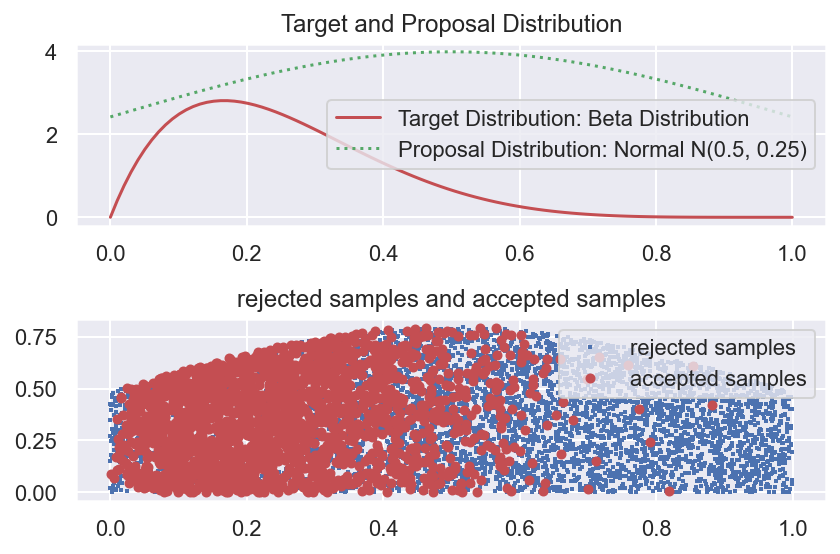

In [10]:
plt.subplot(211)
xx = np.linspace(0, 1, 100)
plt.plot(xx, rv_p.pdf(xx), 'r-', label="Target Distribution: Beta Distribution")
plt.plot(xx, rv_q.pdf(xx) * k, 'g:', label="Proposal Distribution: Normal N(0.5, 0.25)")
plt.legend()
plt.title("Target and Proposal Distribution")
plt.subplot(212)
y = np.random.rand(len(x_q)) * rv_q.pdf(x_q)
plt.plot(x_q, y, 'bs', ms=1, label="rejected samples")
ids = coins < crits
plt.plot(x_q[ids], y[ids], 'ro', ms=4, label="accepted samples")
plt.legend()
plt.title("rejected samples and accepted samples")
plt.tight_layout()
plt.show()

이 방법은 단순하고 inverse 함수를 구하지 않아도 된다는 장점이 있다. <br>
그런데 단점도 있다. 버리는게 너무 많다. <br>
사실은 제안분포를 훨씬 더 크게 만들어도 덮을 수만 있으면 돌릴 수 있는데, <br>
그럼 버리는게 너무 많으니깐 그나마 버리는거 최소화 하려고 한 것. 
![2_242.jpeg](./materials/2_242.jpeg)

근데 이렇게 해도 버리는 부분 많이 생긴다. 1차원일 때는 버리는거 많이 없어도, 차원 올라가면 엄청 버려지게 된다.

지금까지 샘플을 왜 뽑았냐? <br>
사실 직관적으로는 $\mu$ 추정하고 할 때, mode값을 하면 좋겠지. <br>
그런데, 특히 continuous일 때는 mode값을 구하기 어려워. <br>
기댓값을 쓰게 된다. 

## 기댓값 추정

확률분포의 표본을 생성하는 이유 중의 하나는 표본을 이용하여 그 확률분포의 기댓값을 추정할 수 있기 때문이다. 우리가 관심을 가지는 확률분포 $p(X)$에 대해 기댓값

$$ \text{E}[f(X)] = \int f(x)p(x)dx $$

를 구하면 싶을 때, $N$개의 표본 데이터 $\{ x_1, \ldots, x_N \}$이 존재한다면 몬테카를로 적분

$$ \text{E}[f(X)] \approx \dfrac{1}{N} \sum_{i=1}^N f(x_i) $$

을 이용하여 기댓값을 추정할 수 있다. 물론 이 값은 오차가 존재하지만 표본의 갯수 $N$이 증가할수록 오차는 작아진다.

**식이 어렵게 생긴것 같은데, 그냥 보면 뽑은 샘플 데이터를 평균 구하고 기댓값이라고 한 것.**

p(x)는 샘플에 내포되어 있다. p가 높은 위치의 샘플은 많이 만들어지고, p가 낮으면 적게 만들어 지기 때문이다. 이미 샘플을 뽑힐 때, p가 고려가 되어있다. 

앞의 예제에서 $a=2, b=6$인 베타 분포의 기댓값은 

$$ \dfrac{a}{a + b} = \dfrac{1}{4} $$

이지만 표본 데이터를 몬테카를로 적분해도 유사한 값을 얻을 수 있다.

In [11]:
x_p.mean()

0.25452461685193456

In [13]:
x_p

array([0.4243214 , 0.39742087, 0.07295213, ..., 0.07147799, 0.11279853,
       0.44795971])

## Importance Sampling

기댓값을 구하는 것이 최종 목표일 때. rejection sampling처럼 <br>
![2_243.jpeg](./materials/2_243.jpeg)

만약 기댓값을 계산하고자 하는 것이 표본을 생성하는 유일한 목적이라면 표본 생성과 기댓값 계산을 위한 몬테카를로 적분을 하나로 합친 importance sampling을 사용할 수 있다. rejection sampling에서와 같이 $kq > p$인 유사 분포 $q$의 표본을 생성하고 다음 식을 이용하여 직접 기댓값을 계산한다.

$$
\begin{eqnarray}
\text{E}[f(X)] 
&=& \int f(x)p(x)dx  \\
&=& \int f(x)\dfrac{p(x)}{q(x)} q(x) dx  \\
&\approx & \dfrac{1}{N} \sum_{i=1}^N f(x_i)\dfrac{p(x_i)}{q(x_i)}  \\
\end{eqnarray}
$$

이 식에서 $\dfrac{p(x_i)}{q(x_i)}$은 표본에 대한 가중치 역할을 하므로 importance라고 한다. rejection으로 인해 버리는 표본이 없기 때문에 더 효율적인 방법이라고 할 수 있다.

앞의 예를 보자면 rejection sample 과정에서 버린 표본의 수는 전체의 80%에 해당한다.

In [14]:
len(x_p), len(x_q0)

(2038, 10000)

In [ ]:
x_q0 = rv_q.rvs(int(1e4))

importance sampling 방법을 사용하면 버리는 표본없이 바로 기댓값을 구할 수 있다.

In [16]:
rv_p.pdf(x_q0) / rv_q.pdf(x_q0)

array([0.00000000e+00, 9.68866970e-02, 1.14169781e-08, ...,
       3.75319259e-02, 9.35753744e-01, 0.00000000e+00])

In [18]:
np.mean(x_q0 * rv_p.pdf(x_q0) / rv_q.pdf(x_q0))

0.2539186759360591

## 마코프 체인

[Makov Chain](https://www.youtube.com/watch?v=i3AkTO9HLXo&t=2s)

상태값이 $K$개의 유한한 값만 가질 수 있는 이산 상태(discrete-state) 시계열 확률과정에서 시간 $t$의 값 $x_t$의 확률분포 $p(x_t)$가 시간 $t-1$의 값의 확률분포 $p(x_{t-1})$과 조건부확률분포 $p(x_t|x_{t-1})$에만 의존하면 이 시계열 확률과정을 마코프 체인(Markon chain)이라고 한다. 선형 체인 모양의 마코프 네트워크(linear chain Markov network)와는 전혀 다른 뜻이라는 점에 주의하라.

이산 상태 마코프 체인에 전체 확률의 법칙을 적용하면 

$$ p(x_{t}) = \sum_{x_{t-1}} p(x_t, x_{t-1}) = \sum_{x_{t-1}} p(x_t | x_{t-1}) p(x_{t-1}) $$

가 성립한다. $p(x_t)$가 카테고리 분포이므로 행 벡터(row vector) $p_t$로 표현하면 위 식은

$$ p_t = p_{t-1} T  $$

라는 행렬식으로 표현할 수 있다. 이 식에서 조건부 확률을 표현하는 $K\times K$ 행렬 $T$는 전이행렬(transition matrix)라고 한다.

$$ T_{ij} = P(x_t =j \,|\, x_{t-1}=i) $$

전이행렬이 대칭행렬인 마코프 체인을 reversible Markov chain 혹은 detailed balance condition을 만족한다고 한다. 이러한 마코프 체인은 시간 $t$가 흘러감에 따라 초기 조건 $p_0$와 관계없이 항상 같은 분포 $p_{\infty}$로 수렴한다는 것이 증명되어 있다.

$$ p_{t'} = p_{t'+1} = p_{t'+2} = p_{t'+3} = \cdots = p_{\infty} $$

위 식에서 $t'$는 수렴상태에 도달한 이후의 시간을 뜻한다. 따라서 수렴상태에 도달한 후에는 $\{x_{t'}, x_{t'+1}, x_{t'+1}, \ldots, x_{t'+N} \}$ 표본은 모두 같은(identical) 확률분포에서 나온 값이 된다. 이 표본 집합 $\{x_{t'}, x_{t'+1}, x_{t'+1}, \ldots, x_{t'+N} \}$를 trace라고 한다.

![2_244.jpeg](./materials/2_244.jpeg)

## MCMC

MCMC(Markov Chain Monte Carlo) 방법은 rejection sampling이나 importance sampling과 달리 마코프 체인을 이용하는 표본 생성 방법이다. 마코프 체인의 수렴분포가 원하는 분포 $p(x)$가 되도록 하는 마코프 체인을 만들고 이 마코프 체인을 $t'$ 시간 이상 가동하면 그 다음부터는 원하는 분포의 표본을 얻을 수 있다. 

## 메트로폴리스 해이스팅스 방법

메트로폴리스 해이스팅스 표본 생성법(Metropolis-Hastings Sampling)은 MCMC 방법의 일종이다. rejection sampling과 비슷하지만 계산용 분포 $q$로 무조건부 분포 $q(x)$가 아니라 조건부 분포 $q(x^{\ast} \mid x_t)$를 사용한다. $x_t$를 기댓값으로 하는 가우시안 정규분포를 많이 사용한다.

$$ q(x^{\ast} \mid x_t) = \mathcal{N}(x^{\ast} \mid x_t, \sigma^2) $$

표본 생성 방법은 다음과 같다.

1. $t=0$이면 무작위로 $x_t$ 생성. 
2. 표본 생성이 가능한 $q(x^{\ast} \mid x_t=x_t)$ 분포로부터 표본 $x^{\ast}$을 생성한다.
3. 다음 확률에 따라 $x^{\ast}$를 $x_{t+1}$로 선택한다. 이를 메트로폴리스 해이스팅스 기준이라고 한다.
$$ p = \min \left( 1, \dfrac{p(x^{\ast}) q(x_t \mid x^{\ast})}{p(x_t) q(x^{\ast} \mid x_t)} \right)$$
만약 선택되지 않으면(rejection) 새 값을 버리고 한 단계 전의 과거 값을 다시 사용한다. $x_{t+1} = x_{t}$
4. 충분한 수의 샘플이 모일때까지 위 2 ~3 과정을 반복한다.

만약 계산용 분포 $q(x^{\ast} \mid x_t)$가 가우시안 정규분포이면 조건 $x_t$과 결과 $x^{\ast}$가 바뀌어도 확률값은 같다. 

$$ q(x^{\ast} \mid x_t) = q(x_t \mid x^{\ast}) $$

이 경우에는 기준확률이 

$$ p = \min \left( 1, \dfrac{p(x^{\ast})}{p(x_t)} \right)$$

가 된다. 이를 메트로폴리스 기준이라고 한다. 

메트로폴리스 기준을 따르면  $p(x^{\ast})$가 $p(x_t)$보다 크게 만들려고 노력한다. 즉 다음 그림처럼 되도록 확률이 높은 위치로 이동하려고 노력하지만 항상 그렇게 되지는 않는다.



그림 51.3 : 메트로폴리스 해이스팅스 방법

MCMC 방법에는 이외에도 

* Hamiltonian Monte Carlo
* NUTS(No-U-Turn Sampler) 

방법들이 존재한다. Hamiltonian Monte Carlo 방법은 되도록 버려지는 표본이 없도록 확률분포의 그레디언트 벡터 정보를 사용한 최적화를 도입한 방법이다.   NUTS는 Hamiltonian Monte Carlo을 개선한 방법이다. 보다 자세한 내용은 다음 웹사이트를 참조한다.

* http://elevanth.org/blog/2017/11/28/build-a-better-markov-chain/

**현실적으로 가장 많이 쓰는 것은 NUTS샘플러이다.**

## PyMC3

PyMC3는 MCMC 표본 생성과 이를 이용한 베이지안 추정을 하기 위한 파이썬 패키지이다. 추후 설명할 Theano 패키지를 기반으로 하고 있으므로 심볼릭 미분과 GPU 사용으로 빠른 계산이 가능하다.

In [ ]:
# MKL 라이브러리가 설치되어 있으면 다음 코드를 우선 실행한다.
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

import pymc3 as pm

대략적인 사용법은 다음과 같다.

1. `Model` 클래스를 생성한다. 이 클래스 인스턴스가 theano의 function 혹은 텐서플로우의 세션 역할을 한다.
2. 원하는 심볼릭 확률변수를 생성한다. 지원하는 확률분포에 대해서는 API 문서를 참조한다.

   * https://docs.pymc.io/api/distributions.html
   
3. 샘플러 인스턴스를 생성한다. 다음 샘플러를 포함한 다양한 방법을 지원한다.

   * `Metropolis`, `HamiltonianMC`, `NUTS`
   
4. `sample` 명령으로 표본 데이터를 생성한다. 데이터는 Trace 객체형태로 반환하고 `traceplot` 명령으로 시각화할 수 있다.

다음 코드는 메트로폴리스 해이스팅스 방법으로 기댓갑과 분산이 

$$ 
\mu = \begin{bmatrix} 1 \\ -1 \end{bmatrix}, \;\;
\Sigma = \begin{bmatrix} 1 & 1.5 \\ 1.5 & 4 \end{bmatrix}
$$

인 2차원 가우시안 표본을 생성한다.

In [ ]:
cov = np.array([[1., 1.5], [1.5, 4]])
mu = np.array([1, -1])

with pm.Model() as model:
    x = pm.MvNormal('x', mu=mu, cov=cov, shape=(1, 2))
    step = pm.Metropolis()
    trace = pm.sample(1000, step)

import warnings
warnings.simplefilter("ignore")

pm.traceplot(trace)
plt.show()

In [ ]:
plt.scatter(trace['x'][:, 0, 0], trace['x'][:, 0, 1])
plt.show()

## Bayesian Estimation using MCMC

$$ P(\theta \mid x_{1},\ldots,x_{N}) \propto P(x_{1},\ldots,x_{N} \mid \theta)  P(\theta) $$


* $ P(\theta) $: Beta
* $ P(x_{1},\ldots,x_{N} \mid \theta) $: Binomial

In [ ]:
theta0 = 0.7
np.random.seed(0)
x_data1 = sp.stats.bernoulli(theta0).rvs(10)
x_data1

In [ ]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    x = pm.Bernoulli('x', p=theta, observed=x_data1)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace1 = pm.sample(2000, step=step, start=start)

In [ ]:
pm.traceplot(trace1)
plt.show()

In [ ]:
pm.plot_posterior(trace1)
plt.xlim(0, 1)
plt.show()

In [ ]:
pm.summary(trace1)

In [ ]:
np.random.seed(0)
x_data2 = sp.stats.bernoulli(theta0).rvs(500)

In [ ]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    x = pm.Bernoulli('x', p=theta, observed=x_data2)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace2 = pm.sample(1000, step=step, start=start)

In [ ]:
pm.traceplot(trace2)
plt.show()

In [ ]:
pm.plot_posterior(trace2)
plt.xlim(0, 1)
plt.show()

In [ ]:
pm.summary(trace2)

## Bayesian Linear Regression using MCMC

In [ ]:
from sklearn.datasets import make_regression

x, y_data, coef = make_regression(
    n_samples=100, n_features=1, bias=0, noise=20, coef=True, random_state=1)
x = x.flatten()
coef

In [ ]:
plt.scatter(x, y_data)
plt.show()

In [ ]:
with pm.Model() as m:
    w = pm.Normal('w', mu=0, sd=50)
    b = pm.Normal('b', mu=0, sd=50)
    esd = pm.HalfCauchy('esd', 5)
    y = pm.Normal('y', mu=w * x + b, sd=esd, observed=y_data)

    start = pm.find_MAP()
    step = pm.NUTS()
    trace1 = pm.sample(10000, step=step, start=start)

In [ ]:
pm.traceplot(trace1)
plt.show()

In [ ]:
pm.summary(trace1)